<a href="https://colab.research.google.com/github/21PA1A6132/MACHINE-LEARNING/blob/main/Logistic_Regression_On_Titanic_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import numpy as np
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/training_titanic_x_y_train.csv')

In [139]:
Data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [140]:
Data.drop(['Fare','Name','SibSp','Parch','Ticket','Cabin'],inplace=True,axis=1)

Data

,Pclass,Sex,Age,Embarked,Survived
0,2,female,29.0,S,1
1,3,male,NaN,S,0
2,2,male,39.0,S,0
3,3,female,29.0,S,0
4,3,male,25.0,S,0
...,...,...,...,...,...
663,2,female,17.0,S,1
664,3,male,NaN,Q,0
665,3,male,32.0,S,1
666,3,female,22.0,S,0


In [141]:
Data.describe(include='all')

,Pclass,Sex,Age,Embarked,Survived
count,668.000000,668,536.000000,667,668.000000
unique,NaN,2,NaN,3,NaN
top,NaN,male,NaN,S,NaN
freq,NaN,427,NaN,484,NaN
mean,2.296407,NaN,29.700560,NaN,0.402695
std,0.831638,NaN,14.240257,NaN,0.490808
min,1.000000,NaN,0.670000,NaN,0.000000
25%,2.000000,NaN,21.000000,NaN,0.000000
50%,3.000000,NaN,29.000000,NaN,0.000000
75%,3.000000,NaN,38.250000,NaN,1.000000


In [142]:
Data.isnull().sum()

Pclass        0
Sex           0
Age         132
Embarked      1
Survived      0
dtype: int64

In [143]:
Data.shape

(668, 5)

In [144]:
def sex(s):
  if s=='male':
    return 0
  else:
    return 1

Data['Sex'] = Data['Sex'].apply(sex)
Data

,Pclass,Sex,Age,Embarked,Survived
0,2,1,29.0,S,1
1,3,0,NaN,S,0
2,2,0,39.0,S,0
3,3,1,29.0,S,0
4,3,0,25.0,S,0
...,...,...,...,...,...
663,2,1,17.0,S,1
664,3,0,NaN,Q,0
665,3,0,32.0,S,1
666,3,1,22.0,S,0


In [145]:
def embarked(s):
  if s=='S':
    return 0
  elif s=='C':
    return 1
  elif s=='Q':
    return 2


Data['Embarked']=Data.Embarked.apply(embarked)
Data

,Pclass,Sex,Age,Embarked,Survived
0,2,1,29.0,0.0,1
1,3,0,NaN,0.0,0
2,2,0,39.0,0.0,0
3,3,1,29.0,0.0,0
4,3,0,25.0,0.0,0
...,...,...,...,...,...
663,2,1,17.0,0.0,1
664,3,0,NaN,2.0,0
665,3,0,32.0,0.0,1
666,3,1,22.0,0.0,0


In [146]:
Data.isnull().sum()

Pclass        0
Sex           0
Age         132
Embarked      1
Survived      0
dtype: int64

In [147]:
mean_age_survived = Data[Data['Survived']==1]['Age'].mean()
mean_age_deceased = Data[Data['Survived']==1]['Age'].mean()


def fill_age(Data):
  if pd.isnull(Data['Age']):
    if Data['Survived']==1:
      return mean_age_survived
    else:
      return mean_age_deceased
  else:
    return Data['Age']

Data['Age'] = Data.apply(fill_age, axis=1)

In [148]:
Data.Embarked.fillna(Data['Embarked'].mode()[0],inplace=True)

In [149]:
Data.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [150]:
x_train=Data.iloc[:,:4]
y_train=Data.iloc[:,4]

In [151]:
x_train.shape

(668, 4)

In [152]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()



In [153]:
x_train =sc.fit_transform(x_train)

In [154]:
c_column = np.ones((x_train.shape[0],1))

In [155]:
x_train=np.append(x_train,c_column,axis=1)

In [156]:
x_train.shape

(668, 5)

In [157]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [163]:
def cost(x, y, m):
    N = x.shape[0]
    z = np.dot(x, m)
    h = sigmoid(z)
    cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
    total_cost = cost.sum()
    return total_cost / N

In [164]:
def step_gradient(x, y, learning_rate, m):
    N = x.shape[0]
    z = np.dot(x, m)
    h = sigmoid(z)
    gradient = np.dot(x.T, (h - y)) / N
    new_m = m - learning_rate * gradient
    return new_m

In [166]:
def train(x_train, y_train, iterations, learning_rate):
    m = np.zeros(x_train.shape[1])
    costs = []
    for i in range(iterations):
        m = step_gradient(x_train, y_train, learning_rate, m)
        if i % 100 == 0:  # Record cost every 10 iterations
            current_cost = cost(x_train, y_train, m)
            costs.append(current_cost)
            print(i, "Cost:", current_cost)
    return m, costs

In [186]:
# Train the model
m, costs = train(x_train, y_train, 5000, 0.5)

print("Final weights:", m)

0 Cost: 0.642643571827978
10 Cost: 0.49051280006601594
20 Cost: 0.4708285015525946
30 Cost: 0.465984350189515
40 Cost: 0.4644171242408125
50 Cost: 0.4638403315487887
60 Cost: 0.46361370913383554
70 Cost: 0.4635214637190273
80 Cost: 0.46348315102903215
90 Cost: 0.4634670469699158
100 Cost: 0.46346022827887046
110 Cost: 0.46345732796334776
120 Cost: 0.4634560907589932
130 Cost: 0.4634555620241033
140 Cost: 0.4634553357943116
150 Cost: 0.4634552389230287
160 Cost: 0.46345519742219626
170 Cost: 0.46345517963696625
180 Cost: 0.46345517201347275
190 Cost: 0.4634551687452731
200 Cost: 0.46345516734406605
210 Cost: 0.4634551667432776
220 Cost: 0.46345516648567053
230 Cost: 0.4634551663752106
240 Cost: 0.46345516632784545
250 Cost: 0.4634551663075351
260 Cost: 0.4634551662988258
270 Cost: 0.4634551662950912
280 Cost: 0.4634551662934899
290 Cost: 0.4634551662928031
300 Cost: 0.46345516629250866
310 Cost: 0.4634551662923823
320 Cost: 0.46345516629232825
330 Cost: 0.46345516629230504
340 Cost: 0.4

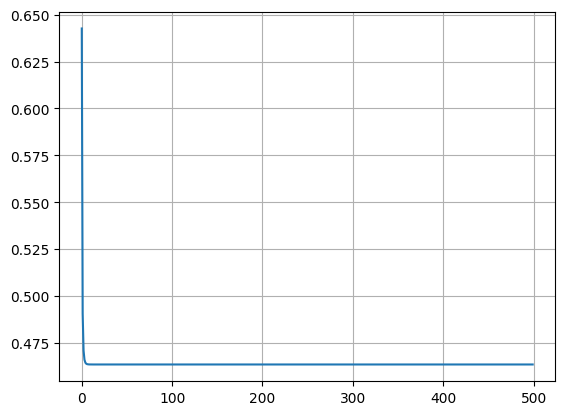

In [187]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.grid()
plt.show()

In [188]:
def predict(X_test,m):

    z = np.dot(X_test, m)
    h = sigmoid(z)
    y_pred = (h >= 0.5).astype(int)
    return y_pred

def accuracy(Y_test,Y_pred):

    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()

    return (correct/N)*100

In [189]:
y_pred_train = predict(x_train,m)
print("Accuracy:",accuracy(y_train,y_pred_train))

Accuracy: 77.69461077844312


In [190]:
x_test = pd.read_csv('/content/drive/MyDrive/Machine Learning/test_titanic_x_test.csv')
x_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [191]:
x_test.shape

(223, 10)

In [192]:
x_test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],inplace=True,axis=1)
x_test

,Pclass,Sex,Age,Embarked
0,2,male,8.0,S
1,1,female,49.0,S
2,3,male,NaN,Q
3,2,female,24.0,S
4,1,male,36.0,S
...,...,...,...,...
218,3,male,20.0,S
219,1,male,45.0,S
220,1,female,17.0,C
221,3,male,43.0,S


In [193]:
x_test['Sex']=x_test['Sex'].apply(sex)
x_test['Embarked']=x_test['Embarked'].apply(embarked)
x_test

,Pclass,Sex,Age,Embarked
0,2,0,8.0,0.0
1,1,1,49.0,0.0
2,3,0,NaN,2.0
3,2,1,24.0,0.0
4,1,0,36.0,0.0
...,...,...,...,...
218,3,0,20.0,0.0
219,1,0,45.0,0.0
220,1,1,17.0,1.0
221,3,0,43.0,0.0


In [194]:
x_test.Age.fillna(x_test['Age'].mean(),inplace=True)
x_test.Embarked.fillna(x_test['Embarked'].mode()[0],inplace=True)
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [196]:
x_test = sc.fit_transform(x_test)


In [203]:
c_column2 = np.ones((x_test.shape[0],1))
x_test=np.append(x_test,c_column2,axis=1)

In [204]:
x_test.shape

(223, 5)

In [205]:
y_pred_test = predict(x_test,m)


In [206]:
y_pred_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0])

In [207]:
np.savetxt('pred_titanic_y_test.csv',y_pred_test)